[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Loading A/D line data from nyse_breadth_2023.csv...

Data summary:
- Time period: 2018-04-04 00:00:00 to 2025-04-22 00:00:00
- Number of trading days: 1773
- Features calculated: 107 (Example: Volatility, Momentum, etc.)
Using 102 features for SOM analysis
Training SOM with dimensions 15x15 for 112500 iterations
Training SOM...
 [ 112500 / 112500 ] 100% - 0:00:00 left 
 quantization error: 4.918919912572675
Clustering 1773 data points into 3 regimes based on BMU weights...
Regime characteristics before mapping (based on data point clustering):
Numerical Regime 0: Count=915, Avg Return=0.1668, Avg Vol=14.5186, Avg VIX=18.87
Numerical Regime 1: Count=598, Avg Return=0.0873, Avg Vol=13.6949, Avg VIX=16.82
Numerical Regime 2: Count=260, Avg Return=-0.4738, Avg Vol=30.1528, Avg VIX=31.51

Initial Data Clusters assigned: 1773 points, Unique values: [0 1 2]

Temporal smoothing impact (window=5, min_persistence=5):
Changed 48 of 1773 classifications (2.7%)
Original vs. Smoothed distribution:
R

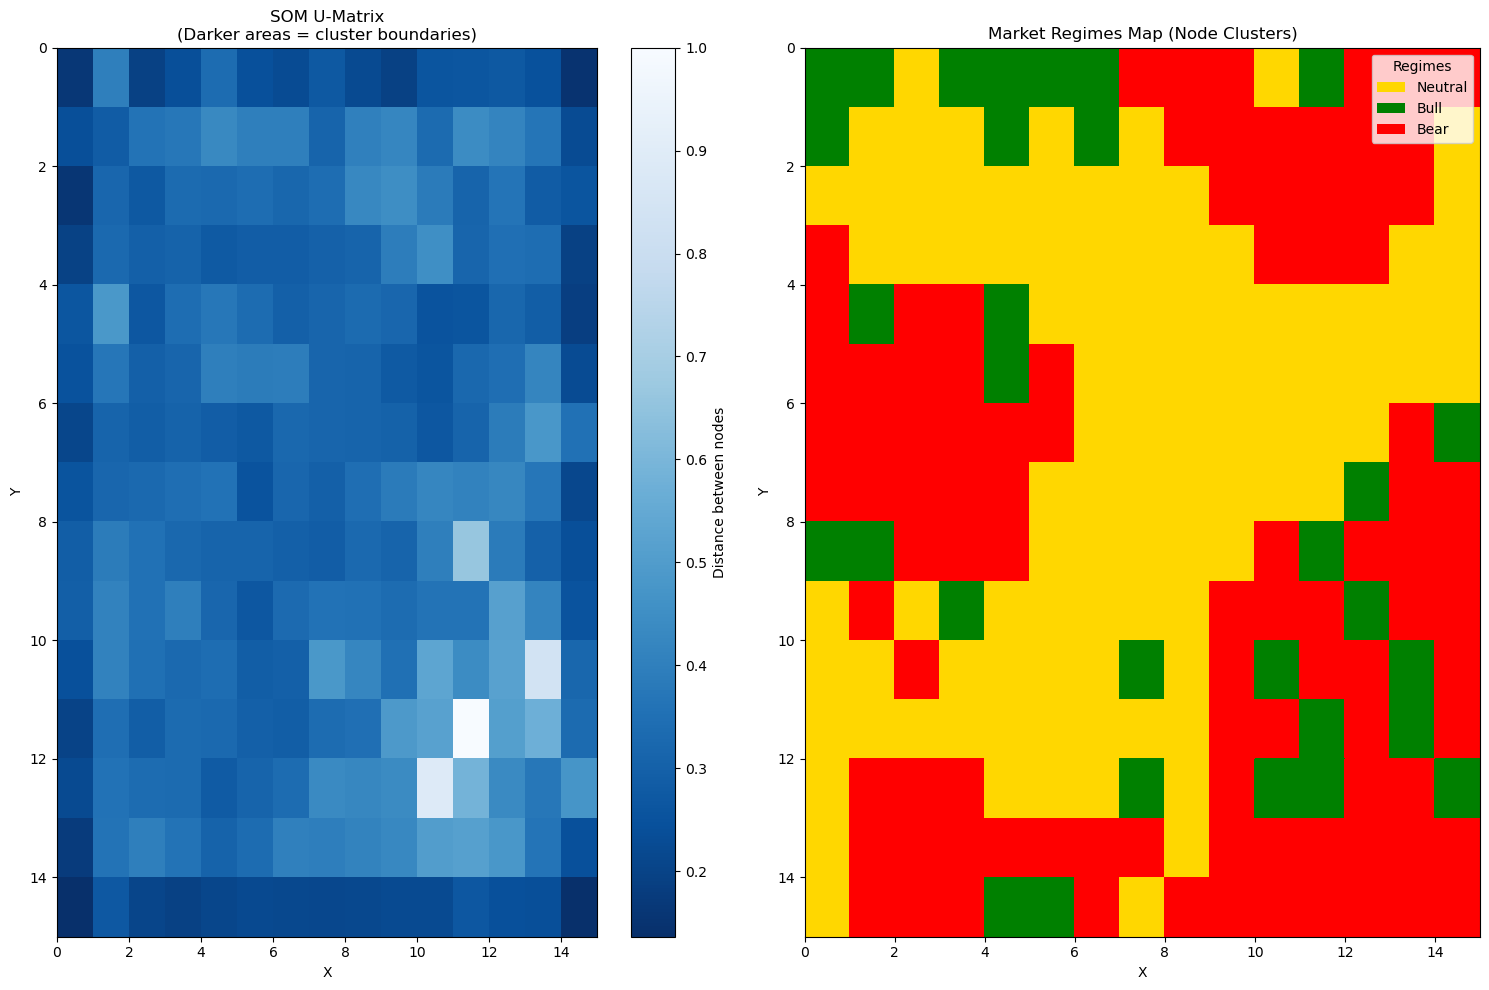

Regimes to plot: ['Bear' 'Bull' 'Neutral']


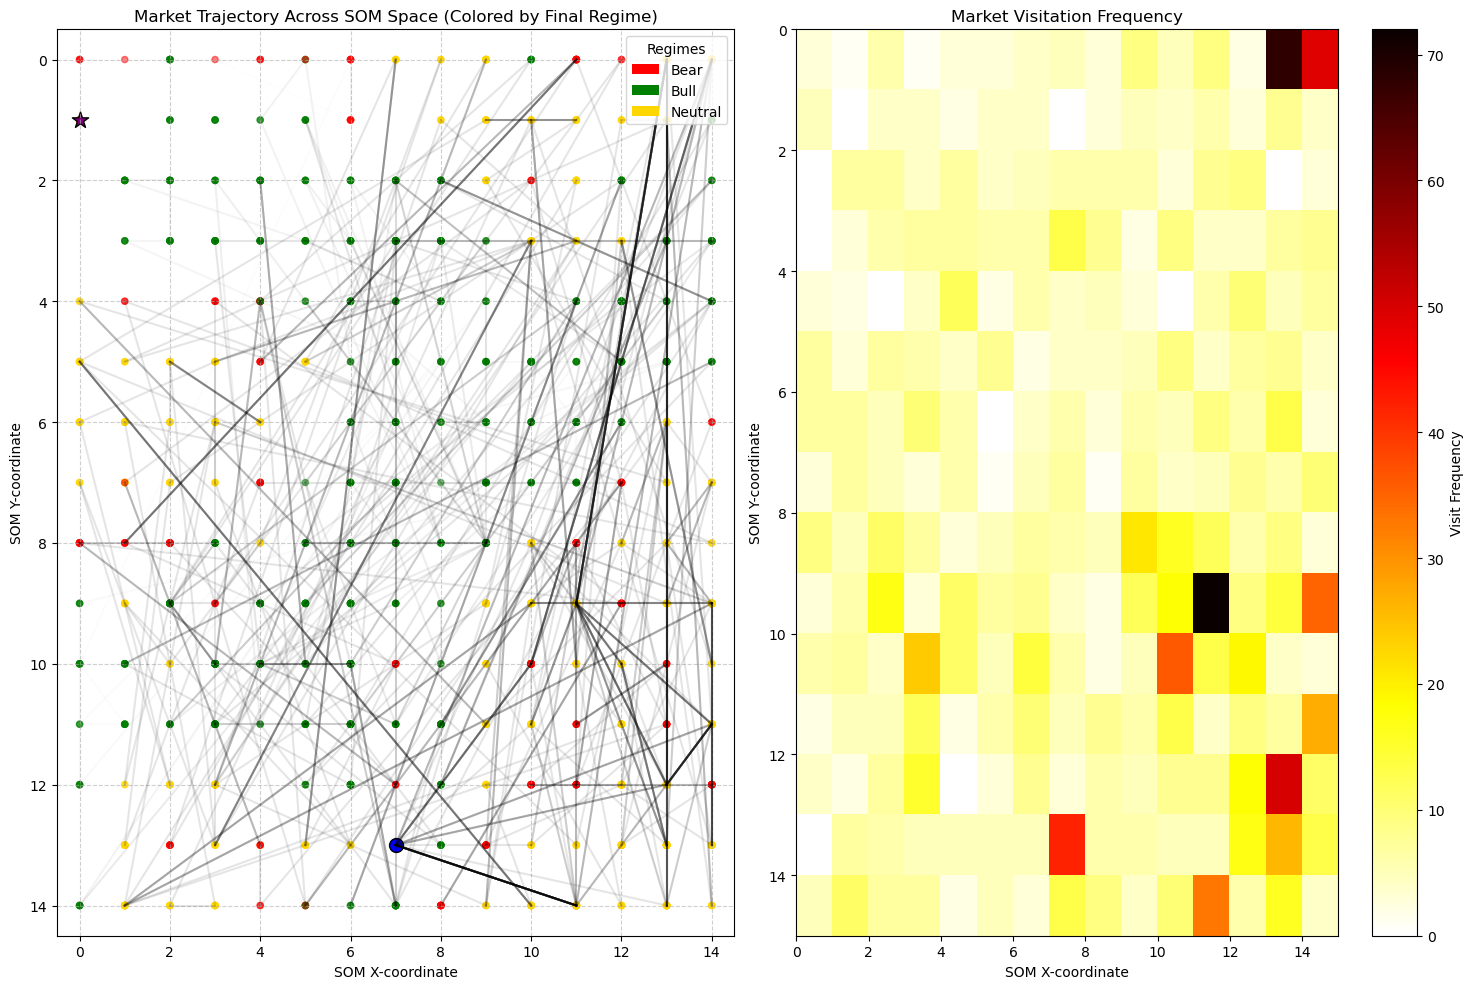

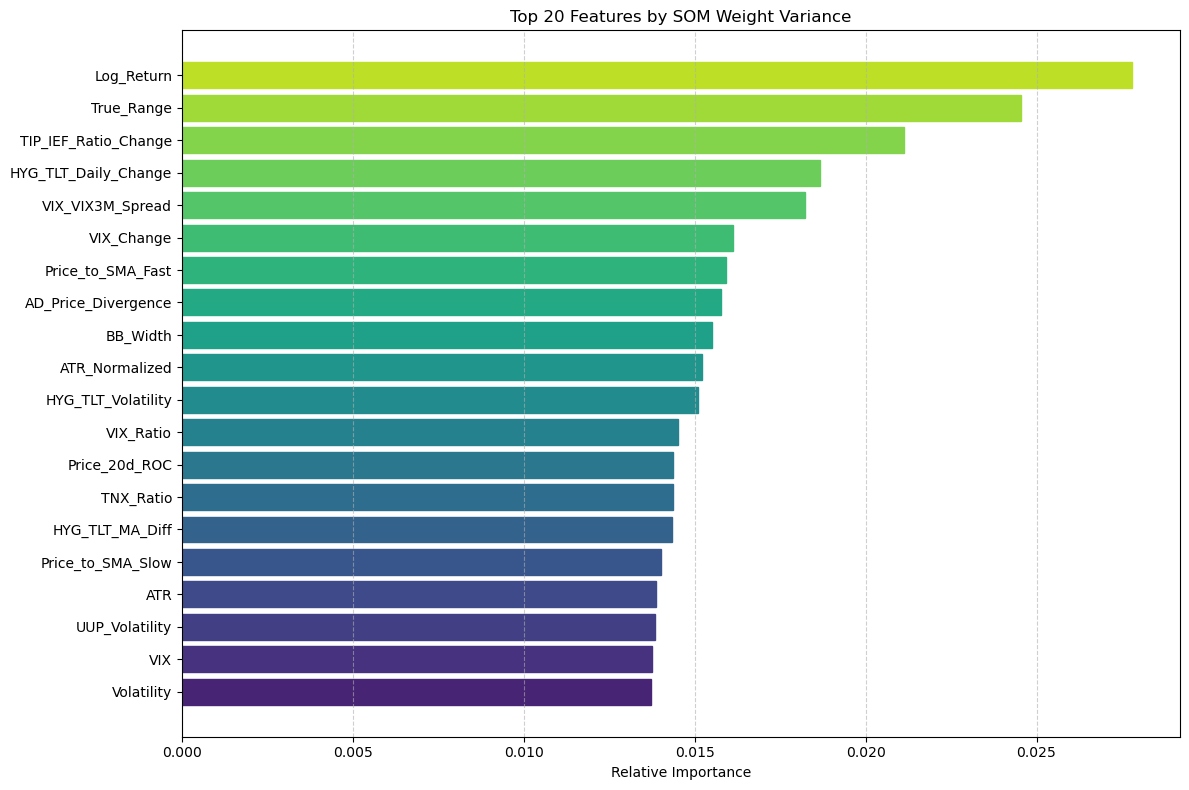


Regime Transitions (Final Smoothed & Labeled):
Neutral → Bear: 2018-04-04 to 2018-10-10 (189 days)
Bear → Neutral: 2018-10-11 to 2018-10-31 (20 days)
Neutral → Bear: 2018-11-01 to 2018-12-06 (35 days)
Bear → Neutral: 2018-12-07 to 2019-01-07 (31 days)
Neutral → Bear: 2019-01-08 to 2020-02-24 (412 days)
Bear → Neutral: 2020-02-25 to 2020-04-15 (50 days)
Neutral → Bear: 2020-04-16 to 2020-10-23 (190 days)
Bear → Neutral: 2020-10-26 to 2020-11-03 (8 days)
Neutral → Bear: 2020-11-04 to 2022-01-19 (441 days)
Bear → Neutral: 2022-01-20 to 2022-02-03 (14 days)
Neutral → Bear: 2022-02-04 to 2022-02-15 (11 days)
Bear → Neutral: 2022-02-16 to 2022-03-17 (29 days)
Neutral → Bull: 2022-03-18 to 2022-04-04 (17 days)
Bull → Bear: 2022-04-05 to 2022-04-21 (16 days)
Bear → Neutral: 2022-04-22 to 2022-05-25 (33 days)
Neutral → Bear: 2022-05-26 to 2022-06-09 (14 days)
Bear → Neutral: 2022-06-10 to 2022-07-18 (38 days)
Neutral → Bear: 2022-07-19 to 2022-08-19 (31 days)
Bear → Bull: 2022-08-22 to 2022-10

In [ ]:
# Ensure these imports are at the top of your script
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import yfinance as yf
from datetime import datetime, timedelta
import warnings
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import seaborn as sns
from minisom import MiniSom
warnings.filterwarnings('ignore')


# ======== CONFIGURABLE PARAMETERS ========
# Market data parameters
TICKER = 'SPY'  # Main ticker to analyze
VIX_TICKER = '^VIX'  # Volatility index
TNX_TICKER = '^TNX'  # 10-Year Treasury Yield
GLD_TICKER = 'GLD'  # Gold ETF
XLY_TICKER = 'XLY'  # Consumer Discretionary ETF
XLP_TICKER = 'XLP'  # Consumer Staples ETF
XLU_TICKER = 'XLU'  # Utilities ETF
XLF_TICKER = 'XLF'  # Financial ETF
HYG_TICKER = 'HYG'  # High Yield Corporate Bond ETF
TLT_TICKER = 'TLT'  # 20+ Year Treasury Bond ETF
VIX3M_TICKER = '^VIX3M'  # 3-Month VIX
IRX_TICKER = '^IRX'  # 2-Year Treasury Yield
UUP_TICKER = 'UUP'  # US Dollar Index ETF
TIP_TICKER = 'TIP'  # TIPS ETF
IEF_TICKER = 'IEF'  # 7-10 Year Treasury ETF
START_DATE = "2018-01-01"  # Historical data start date
END_DATE = "2025-04-25"    # Data end date (updated to latest)

# SOM model parameters
SOM_X_DIM = 15  # SOM grid width
SOM_Y_DIM = 15  # SOM grid height
SOM_ITERATIONS = 112500  # Training iterations 112,500 10000
SOM_SIGMA = 0.7  # Initial neighborhood radius
SOM_LEARNING_RATE = 0.8  # Initial learning rate
NUM_REGIMES = 2  # Number of market regimes to identify

# Technical indicator parameters
VOL_WINDOW = 21  # Window for volatility calculation (21 days ~ 1 month)
MOMENTUM_WINDOW = 63  # Window for momentum calculation (63 days ~ 3 months)
SMA_FAST = 20  # Fast moving average
SMA_SLOW = 50  # Slow moving average
BB_WINDOW = 20  # Bollinger Bands window
BB_STD = 2  # Bollinger Bands standard deviation multiplier
ATR_WINDOW = 14  # Average True Range window
CHOP_WINDOW = 14  # Choppiness Index window
SECTOR_WINDOW = 10  # Window for sector rotation indicators
CREDIT_MA_WINDOW = 30  # Window for credit spread MA

# ======== DATA PREPARATION FUNCTIONS ========

def load_ad_line_data(filepath="nyse_breadth_2023.csv"):
    """Load and prepare NYSE breadth data for A/D line indicators"""
    print(f"Loading A/D line data from {filepath}...")
    
    # Read the CSV file
    ad_data = pd.read_csv(filepath)
    
    # Convert the date column to datetime
    ad_data['Date'] = pd.to_datetime(ad_data['Date'])
    
    # Calculate basic breadth metrics
    # 1. Cumulative A/D Line
    ad_data['Net_Advances'] = ad_data['Advancers'] - ad_data['Decliners']
    ad_data['AD_Line'] = ad_data['Net_Advances'].cumsum()
    
    # 2. A/D Ratio and Z-Score
    ad_data['AD_Ratio'] = ad_data['Advancers'] / ad_data['Decliners']
    ad_data['Log_AD_Ratio'] = np.log(ad_data['AD_Ratio'])
    ad_data['Log_AD_Ratio_21d_Mean'] = ad_data['Log_AD_Ratio'].rolling(window=21).mean()
    ad_data['Log_AD_Ratio_21d_StdDev'] = ad_data['Log_AD_Ratio'].rolling(window=21).std()
    ad_data['AD_Ratio_Z_Score'] = (ad_data['Log_AD_Ratio'] - ad_data['Log_AD_Ratio_21d_Mean']) / ad_data['Log_AD_Ratio_21d_StdDev']
    
    # 3. McClellan Oscillator
    # Calculate EMAs of Net Advances
    ad_data['EMA19_Net_Advances'] = ad_data['Net_Advances'].ewm(span=19, adjust=False).mean()
    ad_data['EMA39_Net_Advances'] = ad_data['Net_Advances'].ewm(span=39, adjust=False).mean()
    ad_data['McClellan_Oscillator'] = ad_data['EMA19_Net_Advances'] - ad_data['EMA39_Net_Advances']
    # Normalize by total issues
    ad_data['Total_Issues'] = ad_data['Advancers'] + ad_data['Decliners'] + ad_data['Neutral']
    ad_data['McClellan_Oscillator_Norm'] = ad_data['McClellan_Oscillator'] / (ad_data['Total_Issues']) * 1000
    
    # 4. Percentage of Advancing Issues
    ad_data['Advancing_Percentage'] = ad_data['Advancers'] / ad_data['Total_Issues'] * 100
    ad_data['Advancing_Percentage_10MA'] = ad_data['Advancing_Percentage'].rolling(window=10).mean()
    ad_data['Advancing_Percentage_Z'] = (ad_data['Advancing_Percentage'] - ad_data['Advancing_Percentage'].rolling(window=21).mean()) / ad_data['Advancing_Percentage'].rolling(window=21).std()
    
    # 5. Breadth Thrust Indicator
    ad_data['Daily_Thrust'] = ad_data['Advancers'] / (ad_data['Advancers'] + ad_data['Decliners'])
    ad_data['Breadth_Thrust'] = ad_data['Daily_Thrust'].ewm(span=10, adjust=False).mean()
    ad_data['Thrust_Signal'] = (ad_data['Breadth_Thrust'] > 0.65).astype(int)
    
    # 6. McClellan Summation Index
    ad_data['McClellan_Summation_Index'] = ad_data['McClellan_Oscillator'].cumsum()
    ad_data['McClellan_SI_10MA'] = ad_data['McClellan_Summation_Index'].rolling(window=10).mean()
    
    # 7. A/D Line Momentum
    ad_data['AD_Line_5d_ROC'] = ad_data['AD_Line'].pct_change(periods=5) * 100
    ad_data['AD_Line_10d_ROC'] = ad_data['AD_Line'].pct_change(periods=10) * 100
    ad_data['AD_Line_20d_ROC'] = ad_data['AD_Line'].pct_change(periods=20) * 100
    ad_data['AD_Line_Momentum_Z'] = (ad_data['AD_Line_10d_ROC'] - ad_data['AD_Line_10d_ROC'].rolling(window=50).mean()) / ad_data['AD_Line_10d_ROC'].rolling(window=50).std()
    
    # 8. A/D Line Moving Average Crossovers
    ad_data['AD_Line_20MA'] = ad_data['AD_Line'].rolling(window=20).mean()
    ad_data['AD_Line_50MA'] = ad_data['AD_Line'].rolling(window=50).mean()
    ad_data['AD_Line_Golden_Cross'] = (ad_data['AD_Line_20MA'] > ad_data['AD_Line_50MA']).astype(int)
    ad_data['AD_Line_Dist_20MA'] = (ad_data['AD_Line'] / ad_data['AD_Line_20MA'] - 1) * 100
    
    # 9. Composite Breadth Indicator
    # Normalize each component to range [0,1]
    ad_data['AD_Ratio_Z_Norm'] = (ad_data['AD_Ratio_Z_Score'].clip(-3, 3) + 3) / 6
    ad_data['McClellan_Osc_Norm'] = (ad_data['McClellan_Oscillator'].clip(-150, 150) + 150) / 300
    ad_data['Breadth_Thrust_Norm'] = ad_data['Breadth_Thrust']
    ad_data['Advancing_Pct_Norm'] = ad_data['Advancing_Percentage'] / 100
    
    # Create composite
    ad_data['Composite_Breadth'] = (ad_data['AD_Ratio_Z_Norm'] + 
                                   ad_data['McClellan_Osc_Norm'] + 
                                   ad_data['Breadth_Thrust_Norm'] + 
                                   ad_data['Advancing_Pct_Norm']) / 4
    
    ad_data['Composite_Breadth_Z'] = (ad_data['Composite_Breadth'] - 
                                     ad_data['Composite_Breadth'].rolling(window=50).mean()) / ad_data['Composite_Breadth'].rolling(window=50).std().fillna(1)
    
    return ad_data

def download_market_data(ticker, vix_ticker, tnx_ticker, gld_ticker, xly_ticker, xlp_ticker, xlu_ticker, xlf_ticker, hyg_ticker, tlt_ticker, start_date, end_date=None):
    """Download and prepare market data"""
    if end_date is None:
        end_date = (datetime.today() + timedelta(days=1)).strftime("%Y-%m-%d")
    print(f"Downloading market data from {start_date} to {end_date}...")
    
    # Download ticker, VIX, TNX, GLD, sector ETFs, and bond ETF data
    df_ticker = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)
    df_vix = yf.download(vix_ticker, start=start_date, end=end_date)
    df_tnx = yf.download(tnx_ticker, start=start_date, end=end_date)
    df_gld = yf.download(gld_ticker, start=start_date, end=end_date)
    df_xly = yf.download(xly_ticker, start=start_date, end=end_date)
    df_xlp = yf.download(xlp_ticker, start=start_date, end=end_date)
    df_xlu = yf.download(xlu_ticker, start=start_date, end=end_date)
    df_xlf = yf.download(xlf_ticker, start=start_date, end=end_date)
    df_hyg = yf.download(hyg_ticker, start=start_date, end=end_date)
    df_tlt = yf.download(tlt_ticker, start=start_date, end=end_date)
    
    # Download additional tickers for new features
    df_vix3m = yf.download(VIX3M_TICKER, start=start_date, end=end_date)
    df_irx = yf.download(IRX_TICKER, start=start_date, end=end_date)
    df_uup = yf.download(UUP_TICKER, start=start_date, end=end_date)
    df_tip = yf.download(TIP_TICKER, start=start_date, end=end_date)
    df_ief = yf.download(IEF_TICKER, start=start_date, end=end_date)
    
    # Fix column structure and reset index
    if len(df_ticker.columns.names) > 1:
        df_ticker.columns = df_ticker.columns.droplevel(1)
    if len(df_vix.columns.names) > 1:
        df_vix.columns = df_vix.columns.droplevel(1)
    if len(df_tnx.columns.names) > 1:
        df_tnx.columns = df_tnx.columns.droplevel(1)
    if len(df_gld.columns.names) > 1:
        df_gld.columns = df_gld.columns.droplevel(1)
    if len(df_xly.columns.names) > 1:
        df_xly.columns = df_xly.columns.droplevel(1)
    if len(df_xlp.columns.names) > 1:
        df_xlp.columns = df_xlp.columns.droplevel(1)
    if len(df_xlu.columns.names) > 1:
        df_xlu.columns = df_xlu.columns.droplevel(1)
    if len(df_xlf.columns.names) > 1:
        df_xlf.columns = df_xlf.columns.droplevel(1)
    if len(df_hyg.columns.names) > 1:
        df_hyg.columns = df_hyg.columns.droplevel(1)
    if len(df_tlt.columns.names) > 1:
        df_tlt.columns = df_tlt.columns.droplevel(1)
    
    # Fix column structure for new tickers
    if len(df_vix3m.columns.names) > 1:
        df_vix3m.columns = df_vix3m.columns.droplevel(1)
    if len(df_irx.columns.names) > 1:
        df_irx.columns = df_irx.columns.droplevel(1)
    if len(df_uup.columns.names) > 1:
        df_uup.columns = df_uup.columns.droplevel(1)
    if len(df_tip.columns.names) > 1:
        df_tip.columns = df_tip.columns.droplevel(1)
    if len(df_ief.columns.names) > 1:
        df_ief.columns = df_ief.columns.droplevel(1)
    
    df_ticker = df_ticker.reset_index()
    df_vix = df_vix.reset_index()
    df_tnx = df_tnx.reset_index()
    df_gld = df_gld.reset_index()
    df_xly = df_xly.reset_index()
    df_xlp = df_xlp.reset_index()
    df_xlu = df_xlu.reset_index()
    df_xlf = df_xlf.reset_index()
    df_hyg = df_hyg.reset_index()
    df_tlt = df_tlt.reset_index()
    
    df_vix3m = df_vix3m.reset_index()
    df_irx = df_irx.reset_index()
    df_uup = df_uup.reset_index()
    df_tip = df_tip.reset_index()
    df_ief = df_ief.reset_index()
    
    # Keep only Date and Close from VIX
    df_vix = df_vix[['Date', 'Close']].rename(columns={'Close': 'VIX'})
    
    # Keep only Date and Close from TNX
    df_tnx = df_tnx[['Date', 'Close']].rename(columns={'Close': 'TNX'})
    
    # Keep only relevant columns from GLD, sector ETFs, and bond ETFs
    df_gld = df_gld[['Date', 'Close']].rename(columns={'Close': 'GLD'})
    df_xly = df_xly[['Date', 'Close']].rename(columns={'Close': 'XLY'})
    df_xlp = df_xlp[['Date', 'Close']].rename(columns={'Close': 'XLP'})
    df_xlu = df_xlu[['Date', 'Close']].rename(columns={'Close': 'XLU'})
    df_xlf = df_xlf[['Date', 'Close']].rename(columns={'Close': 'XLF'})
    df_hyg = df_hyg[['Date', 'Close']].rename(columns={'Close': 'HYG'})
    df_tlt = df_tlt[['Date', 'Close']].rename(columns={'Close': 'TLT'})
    
    # Keep only relevant columns from new tickers
    df_vix3m = df_vix3m[['Date', 'Close']].rename(columns={'Close': 'VIX3M'})
    df_irx = df_irx[['Date', 'Close']].rename(columns={'Close': 'IRX'})
    df_uup = df_uup[['Date', 'Close']].rename(columns={'Close': 'UUP'})
    df_tip = df_tip[['Date', 'Close']].rename(columns={'Close': 'TIP'})
    df_ief = df_ief[['Date', 'Close']].rename(columns={'Close': 'IEF'})
    
    # Merge data
    df = pd.merge(df_ticker, df_vix, on='Date', how='left')
    df = pd.merge(df, df_tnx, on='Date', how='left')
    df = pd.merge(df, df_gld, on='Date', how='left')
    df = pd.merge(df, df_xly, on='Date', how='left')
    df = pd.merge(df, df_xlp, on='Date', how='left')
    df = pd.merge(df, df_xlu, on='Date', how='left')
    df = pd.merge(df, df_xlf, on='Date', how='left')
    df = pd.merge(df, df_hyg, on='Date', how='left')
    df = pd.merge(df, df_tlt, on='Date', how='left')
    
    # Merge new tickers
    df = pd.merge(df, df_vix3m, on='Date', how='left')
    df = pd.merge(df, df_irx, on='Date', how='left')
    df = pd.merge(df, df_uup, on='Date', how='left')
    df = pd.merge(df, df_tip, on='Date', how='left')
    df = pd.merge(df, df_ief, on='Date', how='left')
    
    # Fill missing values with forward fill method
    df['VIX'] = df['VIX'].fillna(method='ffill')
    df['TNX'] = df['TNX'].fillna(method='ffill')
    df['GLD'] = df['GLD'].fillna(method='ffill')
    df['XLY'] = df['XLY'].fillna(method='ffill')
    df['XLP'] = df['XLP'].fillna(method='ffill')
    df['XLU'] = df['XLU'].fillna(method='ffill')
    df['XLF'] = df['XLF'].fillna(method='ffill')
    df['HYG'] = df['HYG'].fillna(method='ffill')
    df['TLT'] = df['TLT'].fillna(method='ffill')
    
    # Fill missing values for new tickers
    df['VIX3M'] = df['VIX3M'].fillna(method='ffill')
    df['IRX'] = df['IRX'].fillna(method='ffill')
    df['UUP'] = df['UUP'].fillna(method='ffill')
    df['TIP'] = df['TIP'].fillna(method='ffill')
    df['IEF'] = df['IEF'].fillna(method='ffill')
    
    # Calculate daily log returns
    df['LogVIX'] = np.log(df['VIX'])
    df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1)) * 100
    df['GLD_Log_Return'] = np.log(df['GLD'] / df['GLD'].shift(1)) * 100
    
    return df

def calculate_bollinger_bands(df, window=20, num_std=2):
    """Calculate Bollinger Bands and related metrics"""
    # Calculate Bollinger Bands
    df['BB_Middle'] = df['Close'].rolling(window=window).mean()
    rolling_std = df['Close'].rolling(window=window).std()
    df['BB_Upper'] = df['BB_Middle'] + (rolling_std * num_std)
    df['BB_Lower'] = df['BB_Middle'] - (rolling_std * num_std)
    
    # Calculate Bollinger Band Width (normalized)
    df['BB_Width'] = (df['BB_Upper'] - df['BB_Lower']) / df['BB_Middle'] * 100
    
    # Calculate %B (position within the bands)
    df['BB_PercentB'] = (df['Close'] - df['BB_Lower']) / (df['BB_Upper'] - df['BB_Lower'])
    
    return df

def calculate_atr(df, window=14):
    """Calculate Average True Range (ATR)"""
    # Calculate True Range
    df['TR1'] = abs(df['High'] - df['Low'])
    df['TR2'] = abs(df['High'] - df['Close'].shift(1))
    df['TR3'] = abs(df['Low'] - df['Close'].shift(1))
    df['True_Range'] = df[['TR1', 'TR2', 'TR3']].max(axis=1)
    
    # Calculate ATR using Wilder's smoothing method
    df['ATR'] = df['True_Range'].rolling(window=window).mean()
    
    # Normalize ATR by price
    df['ATR_Normalized'] = df['ATR'] / df['Close'] * 100
    
    # Clean up intermediate columns
    df = df.drop(['TR1', 'TR2', 'TR3'], axis=1)
    
    return df

def calculate_choppiness_index(df, window=14):
    """Calculate Choppiness Index"""
    if 'ATR' not in df.columns:
        df = calculate_atr(df, window)
    
    df['MaxHi'] = df['High'].rolling(window=window).max()
    df['MinLo'] = df['Low'].rolling(window=window).min()
    df['ATR_Sum'] = df['ATR'].rolling(window=window).sum()
    
    # Calculate Choppiness Index
    df['Choppiness_Index'] = 100 * np.log10(df['ATR_Sum'] / (df['MaxHi'] - df['MinLo'])) / np.log10(window)
    
    # Clean up intermediate columns
    df = df.drop(['MaxHi', 'MinLo', 'ATR_Sum'], axis=1)
    
    return df

def calculate_features(data, ad_data=None):
    """Calculate ALL features for regime classification, including A/D line indicators"""
    df = data.copy()
    
    # Volatility features
    df['Volatility'] = df['Log_Return'].rolling(window=VOL_WINDOW).std() * np.sqrt(252)  # Annualized
    df['Volume_Z_Score'] = (df['Volume'] - df['Volume'].rolling(window=VOL_WINDOW).mean()) / df['Volume'].rolling(window=VOL_WINDOW).std()
    
    # Trend features
    df['Momentum'] = df['Close'].pct_change(periods=MOMENTUM_WINDOW) * 100
    df['SMA_Fast'] = df['Close'].rolling(window=SMA_FAST).mean()
    df['SMA_Slow'] = df['Close'].rolling(window=SMA_SLOW).mean()
    df['SMA_Ratio'] = df['SMA_Fast'] / df['SMA_Slow']
    
    # Price distance from moving averages
    df['Price_to_SMA_Fast'] = df['Close'] / df['SMA_Fast'] - 1
    df['Price_to_SMA_Slow'] = df['Close'] / df['SMA_Slow'] - 1
    
    # VIX-based features
    df['VIX_Ratio'] = df['VIX'] / df['VIX'].rolling(window=VOL_WINDOW).mean()
    df['VIX_Change'] = df['VIX'].pct_change(periods=5) * 100  # 5-day VIX change
    
    # Treasury Yield (TNX) features
    df['TNX_Level'] = df['TNX']  # Absolute yield level
    df['TNX_Daily_Change'] = df['TNX'].diff() * 100  # Daily change in basis points
    df['TNX_Weekly_Change'] = df['TNX'].diff(5) * 100  # 1-week change in basis points
    df['TNX_Z_Score'] = (df['TNX'] - df['TNX'].rolling(window=VOL_WINDOW).mean()) / df['TNX'].rolling(window=VOL_WINDOW).std()
    df['TNX_Ratio'] = df['TNX'] / df['TNX'].rolling(window=VOL_WINDOW).mean()
    
    # Gold (GLD) features
    if df['GLD'].notna().any():
        df['GLD_Volatility'] = df['GLD_Log_Return'].rolling(window=VOL_WINDOW).std() * np.sqrt(252)
        df['GLD_SPY_Ratio'] = df['GLD'] / df['Close']
        df['GLD_SPY_Ratio_Change'] = df['GLD_SPY_Ratio'].pct_change(periods=5) * 100
        df['GLD_Z_Score'] = (df['GLD'] - df['GLD'].rolling(window=VOL_WINDOW).mean()) / df['GLD'].rolling(window=VOL_WINDOW).std()
        df['GLD_Momentum'] = df['GLD'].pct_change(periods=MOMENTUM_WINDOW) * 100
        df['GLD_SPY_Momentum_Diff'] = df['GLD_Momentum'] - df['Momentum']
    
    # Sector Rotation indicators
    if df['XLY'].notna().any() and df['XLP'].notna().any():
        df['XLY_XLP_Ratio'] = df['XLY'] / df['XLP']
        df['XLY_XLP_Change'] = df['XLY_XLP_Ratio'].pct_change(periods=SECTOR_WINDOW) * 100
        df['XLY_XLP_Z'] = (df['XLY_XLP_Ratio'] - df['XLY_XLP_Ratio'].rolling(window=VOL_WINDOW).mean()) / df['XLY_XLP_Ratio'].rolling(window=VOL_WINDOW).std()
    
    if df['XLU'].notna().any():
        df['XLU_SPY_Ratio'] = df['XLU'] / df['Close']
        df['XLU_SPY_Change'] = df['XLU_SPY_Ratio'].pct_change(periods=SECTOR_WINDOW) * 100
        df['XLU_SPY_Z'] = (df['XLU_SPY_Ratio'] - df['XLU_SPY_Ratio'].rolling(window=VOL_WINDOW).mean()) / df['XLU_SPY_Ratio'].rolling(window=VOL_WINDOW).std()
    
    if df['XLF'].notna().any():
        df['XLF_SPY_Ratio'] = df['XLF'] / df['Close']
        df['XLF_SPY_Change'] = df['XLF_SPY_Ratio'].pct_change(periods=SECTOR_WINDOW) * 100
        df['XLF_SPY_Z'] = (df['XLF_SPY_Ratio'] - df['XLF_SPY_Ratio'].rolling(window=VOL_WINDOW).mean()) / df['XLF_SPY_Ratio'].rolling(window=VOL_WINDOW).std()
    
    # Credit Spread indicators (HYG/TLT)
    if df['HYG'].notna().any() and df['TLT'].notna().any():
        df['HYG_TLT_Ratio'] = df['HYG'] / df['TLT']
        df['HYG_TLT_Daily_Change'] = df['HYG_TLT_Ratio'].pct_change() * 100
        df['HYG_TLT_MA'] = df['HYG_TLT_Ratio'].rolling(window=CREDIT_MA_WINDOW).mean()
        df['HYG_TLT_MA_Diff'] = (df['HYG_TLT_Ratio'] / df['HYG_TLT_MA'] - 1) * 100
        df['HYG_TLT_Z'] = (df['HYG_TLT_Ratio'] - df['HYG_TLT_Ratio'].rolling(window=VOL_WINDOW).mean()) / df['HYG_TLT_Ratio'].rolling(window=VOL_WINDOW).std()
        df['HYG_TLT_Volatility'] = df['HYG_TLT_Daily_Change'].rolling(window=VOL_WINDOW).std()
    
    # Volume features
    df['Volume_Trend'] = df['Volume'] / df['Volume'].rolling(window=VOL_WINDOW).mean()
    df['Volume_to_Volatility'] = df['Volume'] / (df['Volatility'] + 1e-10)
    
    # Combined features
    df['Return_Volatility_Ratio'] = df['Log_Return'] / (df['Volatility'] + 1e-10)
    df['VIX_Volatility_Ratio'] = df['VIX'] / (df['Volatility'] + 1e-10)
    
    # Add Bollinger Bands features
    df = calculate_bollinger_bands(df, window=BB_WINDOW, num_std=BB_STD)
    
    # Add ATR features
    df = calculate_atr(df, window=ATR_WINDOW)
    
    # Add Choppiness Index
    df = calculate_choppiness_index(df, window=CHOP_WINDOW)
    
    # Calculate Z-scores for the new indicators
    df['BB_Width_Z'] = (df['BB_Width'] - df['BB_Width'].rolling(window=VOL_WINDOW).mean()) / df['BB_Width'].rolling(window=VOL_WINDOW).std()
    df['ATR_Norm_Z'] = (df['ATR_Normalized'] - df['ATR_Normalized'].rolling(window=VOL_WINDOW).mean()) / df['ATR_Normalized'].rolling(window=VOL_WINDOW).std()
    df['Choppiness_Z'] = (df['Choppiness_Index'] - df['Choppiness_Index'].rolling(window=VOL_WINDOW).mean()) / df['Choppiness_Index'].rolling(window=VOL_WINDOW).std()
    
    # Add the new features requested by the user
    
    # 1. Yield Curve Spread (10Y-2Y)
    if 'TNX' in df.columns and 'IRX' in df.columns:
        # Calculate the spread in percentage points
        df['Yield_Curve_Spread'] = df['TNX'] - df['IRX']
        
        # Calculate Z-score of the spread
        df['Yield_Curve_Spread_Z'] = (df['Yield_Curve_Spread'] - df['Yield_Curve_Spread'].rolling(window=VOL_WINDOW).mean()) / df['Yield_Curve_Spread'].rolling(window=VOL_WINDOW).std()
        
        # Calculate weekly change in the spread
        df['Yield_Curve_Spread_Change'] = df['Yield_Curve_Spread'].diff(5) * 100  # 1-week change in basis points
        
        # Calculate inversion flag (1 if inverted, 0 if normal)
        df['Yield_Curve_Inverted'] = (df['Yield_Curve_Spread'] < 0).astype(int)
    
    # 2. VIX/VIX3M Ratio (Volatility Term Structure)
    if 'VIX' in df.columns and 'VIX3M' in df.columns:
        # Calculate ratio (values < 1 indicate normal contango, values > 1 indicate backwardation/fear)
        df['VIX_VIX3M_Ratio'] = df['VIX'] / df['VIX3M']
        
        # Calculate Z-score of the ratio
        df['VIX_VIX3M_Ratio_Z'] = (df['VIX_VIX3M_Ratio'] - df['VIX_VIX3M_Ratio'].rolling(window=VOL_WINDOW).mean()) / df['VIX_VIX3M_Ratio'].rolling(window=VOL_WINDOW).std()
        
        # Calculate spread (for alternative representation)
        df['VIX_VIX3M_Spread'] = df['VIX'] - df['VIX3M']
        
        # Flag for backwardation (1 if in backwardation, 0 if in contango)
        df['VIX_Backwardation'] = (df['VIX_VIX3M_Ratio'] > 1).astype(int)
    
    # 3. UUP Z-Score (Dollar Strength)
    if 'UUP' in df.columns:
        # Calculate UUP returns
        df['UUP_Return'] = df['UUP'].pct_change() * 100
        
        # Calculate UUP Z-score (normalized dollar strength)
        df['UUP_Z_Score'] = (df['UUP'] - df['UUP'].rolling(window=VOL_WINDOW).mean()) / df['UUP'].rolling(window=VOL_WINDOW).std()
        
        # Calculate UUP momentum
        df['UUP_Momentum'] = df['UUP'].pct_change(periods=VOL_WINDOW) * 100
        
        # Calculate UUP volatility
        df['UUP_Volatility'] = df['UUP_Return'].rolling(window=VOL_WINDOW).std() * np.sqrt(252)
    
    # 4. TIP/IEF Ratio (Inflation Expectations)
    if 'TIP' in df.columns and 'IEF' in df.columns:
        # Calculate the ratio
        df['TIP_IEF_Ratio'] = df['TIP'] / df['IEF']
        
        # Calculate Z-score of the ratio
        df['TIP_IEF_Ratio_Z'] = (df['TIP_IEF_Ratio'] - df['TIP_IEF_Ratio'].rolling(window=VOL_WINDOW).mean()) / df['TIP_IEF_Ratio'].rolling(window=VOL_WINDOW).std()
        
        # Calculate weekly change in the ratio
        df['TIP_IEF_Ratio_Change'] = df['TIP_IEF_Ratio'].pct_change(periods=5) * 100  # 5-day change
        
        # Calculate TIP performance vs SPY
        df['TIP_SPY_Ratio'] = df['TIP'] / df['Close']
        df['TIP_SPY_Ratio_Z'] = (df['TIP_SPY_Ratio'] - df['TIP_SPY_Ratio'].rolling(window=VOL_WINDOW).mean()) / df['TIP_SPY_Ratio'].rolling(window=VOL_WINDOW).std()
    
    # ADD A/D LINE FEATURES
    if ad_data is not None:
        # Merge A/D line data with price data
        ad_data_subset = ad_data[['Date', 'AD_Line', 'AD_Ratio_Z_Score', 'McClellan_Oscillator', 
                                 'McClellan_Oscillator_Norm', 'Advancing_Percentage_Z',
                                 'Breadth_Thrust', 'McClellan_Summation_Index',
                                 'AD_Line_Momentum_Z', 'AD_Line_Dist_20MA', 
                                 'Composite_Breadth_Z', 'AD_Line_Golden_Cross']]
        
        # Convert to datetime to ensure proper merging
        df['Date'] = pd.to_datetime(df['Date'])
        ad_data_subset['Date'] = pd.to_datetime(ad_data_subset['Date'])
        
        # Merge on Date
        df = pd.merge(df, ad_data_subset, on='Date', how='left')
        
        # Calculate AD Line Divergence with Price
        if 'AD_Line' in df.columns:
            # Calculate rates of change for AD Line and Price
            df['AD_Line_20d_ROC'] = df['AD_Line'].pct_change(periods=20) * 100
            df['Price_20d_ROC'] = df['Close'].pct_change(periods=20) * 100
            
            # Calculate divergence spread
            df['AD_Price_Divergence'] = df['AD_Line_20d_ROC'] - df['Price_20d_ROC']
            
            # Calculate correlation over 30-day window
            df['AD_Price_Correlation'] = df['AD_Line'].rolling(window=30).corr(df['Close'])
            
            # Flag negative divergences (AD_Line not confirming price highs)
            price_new_high = df['Close'] > df['Close'].rolling(window=20).max().shift(1)
            ad_line_not_confirming = df['AD_Line'] < df['AD_Line'].rolling(window=20).max().shift(1)
            df['AD_Negative_Divergence'] = (price_new_high & ad_line_not_confirming).astype(int)
    
    # Fill NaN values and drop remaining NaN rows
    df = df.dropna().reset_index(drop=True)
    
    return df

# ======== SOM IMPLEMENTATION ========

def prepare_data_for_som(df):
    """Prepare the full feature set for SOM analysis without dimensionality reduction"""
    # Identify all numeric columns for SOM input (excluding Date)
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Exclude the core price/date columns - we want just the derived features
    exclude_cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
    feature_cols = [col for col in numeric_cols if col not in exclude_cols]
    
    print(f"Using {len(feature_cols)} features for SOM analysis")
    
    # Get the feature data
    feature_data = df[feature_cols].values
    
    # Normalize the data using StandardScaler
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(feature_data)
    
    return normalized_data, feature_cols, scaler

def train_som(data, x_dim, y_dim, iterations=10000, sigma=1.0, learning_rate=0.8):
    """Train a Self-Organizing Map on the market features"""
    print(f"Training SOM with dimensions {x_dim}x{y_dim} for {iterations} iterations")
    
    # Initialize the SOM
    n_features = data.shape[1]
    som = MiniSom(x_dim, y_dim, n_features, sigma=sigma, learning_rate=learning_rate,
                  neighborhood_function='gaussian', random_seed=42)
    
    # Initialize the weights with PCA to ensure better starting point
    som.pca_weights_init(data)
    
    # Train the SOM with a decreasing learning rate and sigma
    print("Training SOM...")
    som.train(data, iterations, verbose=True)
    
    return som

def identify_regimes(som, data, df, n_regimes=3):
    """Identify market regimes by clustering the actual data points based on their BMU node characteristics"""
    # Get the BMUs (Best Matching Units) for each data point
    bmu_indices = np.array([som.winner(x) for x in data])

    # Get the SOM weights (codebook vectors) corresponding to each data point's BMU
    # These represent the 'archetypal' market state closest to each actual day's state
    bmu_weights = np.array([som.get_weights()[bmu[0], bmu[1]] for bmu in bmu_indices])

    # --- Cluster the DATA POINTS based on their BMU weights ---
    # We are clustering the 1773 data points now, using the SOM node characteristics as features
    print(f"Clustering {len(data)} data points into {n_regimes} regimes based on BMU weights...")
    kmeans_data = KMeans(n_clusters=n_regimes, random_state=42, n_init=10) # Use n_init=10 for stability
    data_clusters = kmeans_data.fit_predict(bmu_weights) # Assign cluster labels (0, 1, 2) to each data point

    # --- Create the SOM grid visualization based on node clustering (for consistency check) ---
    # This part remains the same, clustering nodes for the visualization map
    weights = som.get_weights()
    flat_weights = weights.reshape(-1, weights.shape[2])
    kmeans_nodes = KMeans(n_clusters=n_regimes, random_state=42, n_init=10)
    node_cluster_labels = kmeans_nodes.fit_predict(flat_weights)

    som_clusters_visualization = np.zeros((som.get_weights().shape[0], som.get_weights().shape[1]))
    for i in range(som.get_weights().shape[0]):
        for j in range(som.get_weights().shape[1]):
            som_clusters_visualization[i, j] = node_cluster_labels[i * som.get_weights().shape[1] + j]
    # --- End of SOM grid visualization part ---

    # Diagnostic: Calculate stats based on DATA point cluster assignment
    print("Regime characteristics before mapping (based on data point clustering):")
    for i in range(n_regimes):
        mask = (data_clusters == i) # *** CRITICAL: Use data_clusters here ***
        count = np.sum(mask)
        if count > 0:
            avg_return = df.loc[mask, 'Log_Return'].mean()
            avg_vol = df.loc[mask, 'Volatility'].mean() if 'Volatility' in df.columns else np.std(df.loc[mask, 'Log_Return'])
            avg_vix = df.loc[mask, 'VIX'].mean() if 'VIX' in df.columns else np.nan
            
            print(f"Numerical Regime {i}: Count={count}, Avg Return={avg_return:.4f}, "
                  f"Avg Vol={avg_vol:.4f}, Avg VIX={avg_vix:.2f}")
        else:
             print(f"Numerical Regime {i}: Count=0")

    # Return the cluster labels assigned to data points, the grid for visualization, and the data kmeans model
    return data_clusters, som_clusters_visualization, kmeans_data

def apply_temporal_smoothing(regimes, window=5, min_persistence=5): # Default to slightly stronger smoothing
    """
    Apply temporal smoothing to regimes to avoid frequent switching
    with better control parameters and less aggressive smoothing
    """
    # Ensure regimes is a numpy array for efficient processing
    regimes = np.asarray(regimes)
    smoothed_regimes = np.copy(regimes)
    n_points = len(regimes)

    if n_points == 0:
        return smoothed_regimes # Return empty if input is empty

    # --- First pass: standard window-based smoothing (optional, can be skipped if min_persistence is high) ---
    if window > 0:
        temp_smoothed = np.copy(smoothed_regimes)
        for i in range(n_points):
            start_idx = max(0, i - window)
            end_idx = min(n_points, i + window + 1)
            window_regimes = regimes[start_idx:end_idx]
            unique, counts = np.unique(window_regimes, return_counts=True)
            majority_regime = unique[np.argmax(counts)]

            # Change only if the majority is different and clearly dominant
            if majority_regime != regimes[i] and np.max(counts) > 0.6 * len(window_regimes): # Threshold can be tuned
                 temp_smoothed[i] = majority_regime
        smoothed_regimes = temp_smoothed
    # --- End of first pass ---

    # --- Second pass: enforce minimum persistence ---
    if min_persistence > 1:
        final_smoothed = np.copy(smoothed_regimes) # Work on a new copy
        i = 0
        while i < n_points:
            current_regime = final_smoothed[i]
            j = i
            # Find the end of the current contiguous block
            while j < n_points and final_smoothed[j] == current_regime:
                j += 1
            block_length = j - i

            # If block is too short
            if block_length < min_persistence:
                # Look at regimes before and after
                regime_before = final_smoothed[i - 1] if i > 0 else None
                regime_after = final_smoothed[j] if j < n_points else None

                # Determine which adjacent regime to merge with
                target_regime = None
                if regime_before is not None and regime_after is not None:
                    # If both sides are the same, merge with that
                    if regime_before == regime_after:
                        target_regime = regime_before
                    else:
                        # Find length of preceding block
                        k = i - 1
                        len_before = 0
                        while k >= 0 and final_smoothed[k] == regime_before:
                            len_before += 1
                            k -= 1
                        # Find length of succeeding block
                        k = j
                        len_after = 0
                        while k < n_points and final_smoothed[k] == regime_after:
                            len_after += 1
                            k += 1
                        # Merge with the longer adjacent block
                        target_regime = regime_before if len_before >= len_after else regime_after
                elif regime_before is not None: # Only preceding block exists
                    target_regime = regime_before
                elif regime_after is not None: # Only succeeding block exists
                    target_regime = regime_after

                # Apply the merge if a target regime was determined
                if target_regime is not None:
                    final_smoothed[i:j] = target_regime
                    # Important: Need to potentially re-evaluate from the start of the merged block
                    # Find the actual start of the new merged block
                    k = i - 1
                    while k >=0 and final_smoothed[k] == target_regime:
                         k -= 1
                    i = k + 1 # Restart check from the beginning of the merged block
                    continue # Skip incrementing i, restart loop

            # If block is long enough or couldn't be merged, move to the next block
            i = j
        smoothed_regimes = final_smoothed
    # --- End of second pass ---

    # Print diagnostics
    print(f"\nTemporal smoothing impact (window={window}, min_persistence={min_persistence}):")
    changes = np.sum(smoothed_regimes != regimes)
    print(f"Changed {changes} of {n_points} classifications ({changes/max(1, n_points)*100:.1f}%)")

    # Calculate distribution
    orig_unique, orig_counts = np.unique(regimes, return_counts=True)
    smooth_unique, smooth_counts = np.unique(smoothed_regimes, return_counts=True)

    print("Original vs. Smoothed distribution:")
    orig_dict = dict(zip(orig_unique, orig_counts))
    smooth_dict = dict(zip(smooth_unique, smooth_counts))

    all_labels = sorted(set(list(orig_dict.keys()) + list(smooth_dict.keys())))
    for label in all_labels:
        orig_count = orig_dict.get(label, 0)
        smooth_count = smooth_dict.get(label, 0)
        orig_perc = orig_count / max(1, n_points) * 100
        smooth_perc = smooth_count / max(1, n_points) * 100
        print(f"Regime {label}: {orig_count} ({orig_perc:.1f}%) → {smooth_count} ({smooth_perc:.1f}%)")

    return smoothed_regimes

def map_regimes_to_labels(regimes, df, n_regimes=3):
    """Map numeric regime clusters to labels based on adjusted composite score."""
    regime_stats = {}
    print("\nCalculating statistics for regime mapping (Adjusted Score-based):")
    for i in range(n_regimes):
        mask = (regimes == i)
        count = np.sum(mask)
        if count > 0:
            returns = df.loc[mask, 'Log_Return']
            volatility = df.loc[mask, 'Volatility'] if 'Volatility' in df.columns else returns.rolling(window=21).std()
            vix = df.loc[mask, 'VIX'] if 'VIX' in df.columns else None

            avg_return = returns.mean()
            avg_vol = volatility.mean() if isinstance(volatility, pd.Series) else np.nan
            avg_vix = vix.mean() if vix is not None and isinstance(vix, pd.Series) else np.nan

            regime_stats[i] = {
                'return': avg_return,
                'volatility': avg_vol,
                'vix': avg_vix,
                'sharpe': avg_return / returns.std() if returns.std() > 0 else 0,
                'count': count
            }
            print(f"Numerical Regime {i}: Count={count}, Avg Return={avg_return:.4f}, Avg Vol={avg_vol:.4f}, Avg VIX={avg_vix:.2f}")
        else:
             print(f"Numerical Regime {i}: Count=0")
             # Add placeholder stats for sorting if needed
             regime_stats[i] = {'return': -np.inf, 'volatility': np.inf, 'vix': np.inf, 'sharpe': -np.inf, 'count': 0}


    # Create a composite score for ranking regimes - ADJUSTED PENALTIES
    for i in regime_stats:
         if regime_stats[i]['count'] > 0:
            # Higher return = more bullish, higher volatility or VIX = more bearish
            regime_stats[i]['score'] = regime_stats[i]['return'] * 3  # Increased weight on returns

            if not np.isnan(regime_stats[i]['volatility']):
                # Reduced penalty for volatility
                regime_stats[i]['score'] -= regime_stats[i]['volatility'] * 0.25
            else:
                 regime_stats[i]['score'] -= 1 # Penalize missing vol slightly

            if 'vix' in regime_stats[i] and not np.isnan(regime_stats[i]['vix']):
                 # Reduced penalty for VIX
                regime_stats[i]['score'] -= (regime_stats[i]['vix'] / 150)
            else:
                regime_stats[i]['score'] -= 0.1 # Penalize missing VIX slightly
         else:
             regime_stats[i]['score'] = -np.inf # Ensure empty regimes sort last


    # Sort regimes by composite score (highest to lowest)
    sorted_regimes = sorted(regime_stats.items(), key=lambda x: x[1]['score'], reverse=True)

    # Create mapping
    regime_mapping = {}
    regime_labels = ['Bull', 'Neutral', 'Bear'] # Adjust if n_regimes != 3

    print("\nRegime mapping based on adjusted composite scores:")
    for i, (regime, stats) in enumerate(sorted_regimes):
         if i < len(regime_labels):
            regime_mapping[regime] = regime_labels[i]
            print(f"Cluster {regime} → {regime_labels[i]}: "
                  f"Return={stats['return']:.4f}, Vol={stats['volatility']:.4f}, "
                  f"Score={stats['score']:.4f}, Count={stats['count']}")
         else: # Fallback for more than 3 regimes
             regime_mapping[regime] = f"Regime_{regime}"
             print(f"Cluster {regime} → Regime_{regime}: "
                   f"Return={stats['return']:.4f}, Vol={stats['volatility']:.4f}, "
                   f"Score={stats['score']:.4f}, Count={stats['count']}")

    # Apply mapping to create labeled regimes
    # Ensure all regimes in the input array are mapped
    labeled_regimes = np.array([regime_mapping.get(int(r), f"Unknown_{int(r)}") for r in regimes])


    # Verify distribution
    unique_labels, counts = np.unique(labeled_regimes, return_counts=True)
    print("\nFinal regime distribution:")
    for label, count in zip(unique_labels, counts):
        print(f"{label}: {count} ({count/len(labeled_regimes)*100:.1f}%)")

    return labeled_regimes, regime_mapping

def calculate_regime_statistics(df, regimes, labeled_regimes):
    """Calculate key statistics for each market regime - robust version"""
    regime_stats = {}
    unique_numeric_regimes = np.unique(regimes) # Use numeric regimes for looping
    unique_labels = np.unique(labeled_regimes) # Get unique labels present

    # Map numeric regimes back to labels (handles cases where smoothing removes a regime)
    numeric_to_label_map = {}
    for label in unique_labels:
         # Find the numeric regime(s) corresponding to this label
         mask_label = (labeled_regimes == label)
         if np.any(mask_label):
             # Find the first numeric regime value associated with this label
             numeric_regime_for_label = regimes[np.where(mask_label)[0][0]]
             numeric_to_label_map[numeric_regime_for_label] = label

    print(f"\nCalculating statistics for numeric regimes: {unique_numeric_regimes}")
    print(f"Mapping numeric to labels used for stats: {numeric_to_label_map}")

    # Iterate through labels present in the final labeled_regimes
    for label in unique_labels:
        mask = (labeled_regimes == label) # Use label mask for consistency
        count = np.sum(mask)

        if count == 0:
            print(f"Warning: No data points found for final label '{label}'. Skipping stats calculation.")
            continue

        # Basic statistics
        returns = df.loc[mask, 'Log_Return']

        # Safely calculate stats, handle potential NaNs from feature calculation
        avg_vix = df.loc[mask, 'VIX'].mean() if 'VIX' in df.columns and not df.loc[mask, 'VIX'].isnull().all() else np.nan
        avg_vol = df.loc[mask, 'Volatility'].mean() if 'Volatility' in df.columns and not df.loc[mask, 'Volatility'].isnull().all() else np.nan
        avg_mom = df.loc[mask, 'Momentum'].mean() if 'Momentum' in df.columns and not df.loc[mask, 'Momentum'].isnull().all() else np.nan
        avg_atr = df.loc[mask, 'ATR_Normalized'].mean() if 'ATR_Normalized' in df.columns and not df.loc[mask, 'ATR_Normalized'].isnull().all() else np.nan
        avg_chop = df.loc[mask, 'Choppiness_Index'].mean() if 'Choppiness_Index' in df.columns and not df.loc[mask, 'Choppiness_Index'].isnull().all() else np.nan

        regime_stats[label] = {
            'count': count,
            'return_mean': returns.mean(),
            'return_std': returns.std(),
            'annualized_return': returns.mean() * 252,
            'annualized_volatility': returns.std() * np.sqrt(252),
            'sharpe': (returns.mean() * 252) / (returns.std() * np.sqrt(252)) if returns.std() > 0 else 0,
            'hit_rate': (returns > 0).mean() * 100,
            'avg_vix': avg_vix,
            'avg_volatility': avg_vol,
            'avg_momentum': avg_mom,
            'avg_atr_norm': avg_atr,
            'avg_choppiness': avg_chop
        }

        # Calculate conditional max drawdown
        regime_data = df[mask].copy()
        if len(regime_data) > 0:
            # Ensure regime_data index aligns with drawdown calculation needs
            regime_data.reset_index(drop=True, inplace=True)
            regime_data['Cumulative_Return'] = (1 + regime_data['Log_Return'] / 100).cumprod()
            peak = regime_data['Cumulative_Return'].expanding().max()
            drawdown = (regime_data['Cumulative_Return'] / peak - 1) * 100
            regime_stats[label]['max_drawdown'] = drawdown.min()
        else:
            regime_stats[label]['max_drawdown'] = np.nan

    return regime_stats

def analyze_regime_transitions(regimes, dates):
    """Analyze transitions between regimes"""
    transitions = []
    current_regime = regimes[0]
    start_date = dates.iloc[0]  # Use iloc instead of direct indexing
    
    for i in range(1, len(regimes)):
        if regimes[i] != current_regime:
            # Regime change detected
            end_date = dates.iloc[i - 1]  # Use iloc instead of direct indexing
            duration = (end_date - start_date).days
            
            transitions.append({
                'from_regime': current_regime,
                'to_regime': regimes[i],
                'start_date': start_date,
                'end_date': end_date,
                'duration_days': duration
            })
            
            # Start new regime period
            current_regime = regimes[i]
            start_date = dates.iloc[i]  # Use iloc instead of direct indexing
    
    # Add the final regime period
    if len(regimes) > 0:
        duration = (dates.iloc[-1] - start_date).days  # Use iloc instead of direct indexing
        transitions.append({
            'from_regime': current_regime,
            'to_regime': None,
            'start_date': start_date,
            'end_date': dates.iloc[-1],  # Use iloc instead of direct indexing
            'duration_days': duration
        })
    
    return transitions

def classify_regimes_by_returns(df, smoothing_window=5):
    """
    Alternative approach: Classify regimes directly based on returns and volatility
    without relying on SOM clustering
    """
    # Calculate smoothed returns and volatility
    df['Smoothed_Return'] = df['Log_Return'].rolling(window=smoothing_window).mean()
    df['Smoothed_Volatility'] = df['Log_Return'].rolling(window=21).std() * np.sqrt(252)  # Annualized
    
    # Initialize regime array
    regimes = np.zeros(len(df), dtype=int)
    
    # Fill in missing values at the beginning
    df['Smoothed_Return'] = df['Smoothed_Return'].fillna(0)
    df['Smoothed_Volatility'] = df['Smoothed_Volatility'].fillna(df['Smoothed_Volatility'].mean())
    
    # VIX threshold if available
    if 'VIX' in df.columns:
        vix_threshold = df['VIX'].mean() + df['VIX'].std()
    else:
        vix_threshold = float('inf')
    
    # Classify based on simple rules
    for i in range(len(df)):
        ret = df['Smoothed_Return'].iloc[i]
        vol = df['Smoothed_Volatility'].iloc[i]
        vix = df['VIX'].iloc[i] if 'VIX' in df.columns else 0
        
        # Bear market: negative returns and high volatility OR very high VIX
        if (ret < -0.1 and vol > df['Smoothed_Volatility'].quantile(0.7)) or vix > vix_threshold * 1.5:
            regimes[i] = 2  # Bear
        # Bull market: positive returns and reasonable volatility
        elif ret > 0.1 and vol < df['Smoothed_Volatility'].quantile(0.7):
            regimes[i] = 0  # Bull
        # Neutral market: everything else
        else:
            regimes[i] = 1  # Neutral
    
    # Apply temporal smoothing
    smoothed_regimes = apply_temporal_smoothing(regimes, window=smoothing_window)
    
    # Map to labels
    regime_labels = ['Bull', 'Neutral', 'Bear']
    labeled_regimes = np.array([regime_labels[int(r)] for r in smoothed_regimes])
    
    return labeled_regimes, smoothed_regimes


def calculate_feature_importance(som, feature_names):
    """Calculate feature importance for the SOM"""
    # Calculate the spread of weights for each feature
    weights = som.get_weights()
    feature_importance = {}
    
    for i, feature in enumerate(feature_names):
        # Calculate the range of values for this feature across all nodes
        feature_range = np.ptp(weights[:, :, i])
        feature_importance[feature] = feature_range
    
    # Normalize importance values
    total = sum(feature_importance.values())
    for feature in feature_importance:
        feature_importance[feature] /= total
    
    # Sort by importance
    sorted_importance = dict(sorted(feature_importance.items(), key=lambda x: x[1], reverse=True))
    
    return sorted_importance

# ======== VISUALIZATION FUNCTIONS ========

def plot_som_umatrix(som, som_clusters_visualization, final_regime_mapping):
    """Plot the SOM U-Matrix with regime boundaries using the FINAL regime mapping."""
    # Calculate the U-Matrix
    umatrix = som.distance_map()

    # Define base colors
    regime_colors = {
        'Bull': 'green',
        'Neutral': 'gold',
        'Bear': 'red',
        # Add fallbacks for potential unmapped labels
    }
    fallback_colors = ['grey', 'cyan', 'magenta', 'lime', 'orange']
    color_idx = 0

    # --- Create the colormap and legend elements dynamically based on the FINAL mapping ---
    # Invert the final_regime_mapping to map label -> numeric cluster id(s)
    label_to_cluster_id = {}
    for cluster_id, label in final_regime_mapping.items():
         if label not in label_to_cluster_id:
             label_to_cluster_id[label] = []
         label_to_cluster_id[label].append(cluster_id)

    unique_cluster_ids_on_map = np.unique(som_clusters_visualization)
    print(f"Unique cluster IDs on SOM visualization map: {unique_cluster_ids_on_map}")
    print(f"Final regime mapping provided: {final_regime_mapping}")

    node_colormap = []
    legend_elements = []
    processed_labels = set()

    # Generate colors for the specific cluster IDs present on the map
    cluster_id_to_color = {}
    sorted_unique_cluster_ids = sorted(unique_cluster_ids_on_map)

    for cluster_id in sorted_unique_cluster_ids:
        label = final_regime_mapping.get(cluster_id)
        if label:
            color = regime_colors.get(label, fallback_colors[color_idx % len(fallback_colors)])
            if label not in processed_labels:
                 legend_elements.append(Patch(facecolor=color, label=label))
                 processed_labels.add(label)
        else:
            # Handle cluster IDs present on map but somehow not in final mapping
            print(f"Warning: Cluster ID {cluster_id} found on map but not in final mapping. Using fallback color.")
            color = fallback_colors[color_idx % len(fallback_colors)]
            label = f"Cluster {int(cluster_id)}"
            if label not in processed_labels:
                 legend_elements.append(Patch(facecolor=color, label=label))
                 processed_labels.add(label)
        cluster_id_to_color[cluster_id] = color
        color_idx += 1

    # Create the colormap array based on the cluster IDs present
    node_colormap = [cluster_id_to_color[cid] for cid in sorted_unique_cluster_ids]
    # --- End of dynamic colormap generation ---

    # Plot
    plt.figure(figsize=(15, 10))

    # Plot 1: U-Matrix
    plt.subplot(1, 2, 1)
    plt.pcolor(umatrix.T, cmap='Blues_r')
    plt.colorbar(label='Distance between nodes')
    plt.title('SOM U-Matrix\n(Darker areas = cluster boundaries)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.gca().invert_yaxis() # Ensure Y axis matches map

    # Plot 2: Regime Clusters (using node clustering visualization)
    plt.subplot(1, 2, 2)
    # Ensure correct mapping from cluster IDs to colors
    custom_cmap = ListedColormap(node_colormap)
    # We need to map the som_clusters_visualization values (cluster IDs) to the colormap indices
    norm = plt.Normalize(vmin=min(sorted_unique_cluster_ids), vmax=max(sorted_unique_cluster_ids))
    # Adjust pcolor call if necessary based on data type and range
    im = plt.pcolor(som_clusters_visualization.T, cmap=custom_cmap, norm=norm)

    plt.legend(handles=legend_elements, loc='upper right', title="Regimes")
    plt.title('Market Regimes Map (Node Clusters)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.gca().invert_yaxis() # Ensure Y axis matches map

    plt.tight_layout()
    plt.show()


def plot_regime_time_series(df, regimes, labeled_regimes):
    """Plot the market price with regime classifications over time - fixed version"""
    # Ensure all regimes are recognized
    unique_regimes = np.unique(labeled_regimes)
    print(f"Regimes to plot: {unique_regimes}")
    
    # Define colors for regimes
    regime_colors = {
        'Bull': 'green',
        'Neutral': 'gold',
        'Bear': 'red'
    }
    
    # Create a figure with subplots
    fig = make_subplots(rows=2, cols=1, 
                        shared_xaxes=True,
                        vertical_spacing=0.05,
                        subplot_titles=('Market Price with Regime Classification', 'Regime Distribution'),
                        row_heights=[0.7, 0.3])
    
    # Add price trace
    fig.add_trace(
        go.Scatter(
            x=df['Date'],
            y=df['Close'],
            mode='lines',
            name='Price',
            line=dict(color='black', width=1)
        ),
        row=1, col=1
    )
    
    # Add colored regions for different regimes
    for regime in unique_regimes:
        # Create a mask for this regime
        regime_mask = (labeled_regimes == regime)
        if not any(regime_mask):
            print(f"Warning: No data points for regime {regime}")
            continue
            
        # Get the color
        color = regime_colors.get(regime, 'gray')
        
        # Add colored background for periods when this regime is active
        for i in range(len(df) - 1):
            if regime_mask[i]:
                fig.add_shape(
                    type='rect',
                    x0=df['Date'].iloc[i],
                    x1=df['Date'].iloc[i+1],
                    y0=0,
                    y1=df['Close'].max() * 1.1,
                    fillcolor=color,
                    opacity=0.2,
                    layer='below',
                    line_width=0,
                    row=1, col=1
                )
    
    # Add regime indicator in second subplot
    for regime in unique_regimes:
        regime_indicator = np.where(labeled_regimes == regime, 1, 0)
        
        fig.add_trace(
            go.Scatter(
                x=df['Date'],
                y=regime_indicator,
                mode='lines',
                name=f'{regime} Regime',
                line=dict(color=regime_colors.get(regime, 'gray'), width=2),
                fill='tozeroy'
            ),
            row=2, col=1
        )
    
    # Update layout
    fig.update_layout(
        title='Market Regimes Identified by SOM',
        xaxis_title='Date',
        yaxis_title='Price',
        legend_title='Regimes',
        height=800,
        template='plotly_white'
    )
    
    # Set y-axis range for regime indicators
    fig.update_yaxes(range=[-0.1, 1.1], title='Active', row=2, col=1)
    
    fig.show()

def plot_market_trajectory(som, data, labeled_regimes, df, final_regime_mapping):
    """Visualize the market trajectory across the SOM using FINAL labeled regimes."""
    # Get BMUs for each data point
    bmu_indices = np.array([som.winner(x) for x in data])

    # Create a 2D grid for visualization
    x_coords = bmu_indices[:, 0]
    y_coords = bmu_indices[:, 1]

    # Get SOM dimensions
    x_dim = som.get_weights().shape[0]
    y_dim = som.get_weights().shape[1]

    # --- Create regime colors for points based on FINAL labeled_regimes ---
    regime_colors_map = {
        'Bull': 'green',
        'Neutral': 'gold',
        'Bear': 'red'
    }
    point_colors = [regime_colors_map.get(label, 'gray') for label in labeled_regimes]
    # --- End color logic update ---

    # Create a 2D heatmap of market visitation frequency
    heatmap = np.zeros((x_dim, y_dim))
    for x, y in bmu_indices:
        heatmap[x, y] += 1

    # Create the plot
    plt.figure(figsize=(15, 10))

    # Plot 1: Market trajectory over time
    plt.subplot(1, 2, 1)

    # Plot the trajectory line (consider plotting segments colored by regime)
    # Simple version: fading grey lines
    for i in range(len(bmu_indices) - 1):
        x_from, y_from = bmu_indices[i]
        x_to, y_to = bmu_indices[i + 1]
        age = 1 - i / len(bmu_indices) # Fading effect
        plt.plot([x_from, x_to], [y_from, y_to], 'k-', alpha=min(0.1, age * 0.5)) # Adjusted alpha

    # Plot the data points using the final labels for colors
    plt.scatter(x_coords, y_coords, c=point_colors, alpha=0.5, s=20) # Adjusted alpha/size

    # Highlight the start and end points
    plt.scatter(x_coords[0], y_coords[0], c='blue', s=100, marker='o', label='Start', edgecolors='black')
    plt.scatter(x_coords[-1], y_coords[-1], c='purple', s=150, marker='*', label='Current', edgecolors='black')

    # Customize the plot
    plt.title('Market Trajectory Across SOM Space (Colored by Final Regime)')
    plt.xlabel('SOM X-coordinate')
    plt.ylabel('SOM Y-coordinate')
    plt.xlim(-0.5, x_dim - 0.5)
    plt.ylim(-0.5, y_dim - 0.5)
    plt.grid(True, linestyle='--', alpha=0.6)
    # Create custom legend for colors shown in scatter
    legend_elements = [Patch(facecolor=regime_colors_map[label], label=label)
                       for label in np.unique(labeled_regimes) if label in regime_colors_map]
    plt.legend(handles=legend_elements, title="Regimes", loc='upper right')
    plt.gca().invert_yaxis() # Ensure Y axis matches maps


    # Plot 2: Heatmap of market visitation frequency
    plt.subplot(1, 2, 2)
    plt.pcolor(heatmap.T, cmap='hot_r')
    plt.colorbar(label='Visit Frequency')
    plt.title('Market Visitation Frequency')
    plt.xlabel('SOM X-coordinate')
    plt.ylabel('SOM Y-coordinate')
    plt.gca().invert_yaxis() # Ensure Y axis matches maps


    plt.tight_layout()
    plt.show()

def plot_feature_importance(feature_importance, top_n=20):
    """Plot feature importance from the SOM analysis"""
    # Get the top N features
    top_features = dict(list(feature_importance.items())[:top_n])
    
    # Create a bar chart
    plt.figure(figsize=(12, 8))
    bars = plt.barh(list(top_features.keys())[::-1], list(top_features.values())[::-1])
    
    # Color bars by importance
    colors = plt.cm.viridis(np.linspace(0.1, 0.9, len(top_features)))
    for i, bar in enumerate(bars):
        bar.set_color(colors[i])
    
    plt.xlabel('Relative Importance')
    plt.title(f'Top {top_n} Features by SOM Weight Variance')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

def plot_regime_performance(regime_stats):
    """Plot performance metrics for each regime"""
    # Create a DataFrame for plotting
    stats_df = pd.DataFrame(regime_stats).T.reset_index()
    stats_df.columns = ['Regime'] + list(stats_df.columns[1:])
    
    # Define colors for regimes
    regime_colors = {
        'Bull': 'green',
        'Neutral': 'gold',
        'Bear': 'red'
    }
    
    # Create a figure with subplots
    fig = make_subplots(rows=2, cols=2, 
                        subplot_titles=('Annualized Return', 'Volatility', 'Sharpe Ratio', 'Hit Rate'),
                        vertical_spacing=0.1,
                        horizontal_spacing=0.1)
    
    # Plot 1: Annualized Return
    for regime in stats_df['Regime']:
        regime_data = stats_df[stats_df['Regime'] == regime]
        color = regime_colors.get(regime, 'gray')
        
        fig.add_trace(
            go.Bar(
                x=[regime],
                y=[regime_data['annualized_return'].values[0]],
                name=regime,
                marker_color=color
            ),
            row=1, col=1
        )
    
    # Plot 2: Volatility
    for regime in stats_df['Regime']:
        regime_data = stats_df[stats_df['Regime'] == regime]
        color = regime_colors.get(regime, 'gray')
        
        fig.add_trace(
            go.Bar(
                x=[regime],
                y=[regime_data['annualized_volatility'].values[0]],
                name=regime,
                marker_color=color,
                showlegend=False
            ),
            row=1, col=2
        )
    
    # Plot 3: Sharpe Ratio
    for regime in stats_df['Regime']:
        regime_data = stats_df[stats_df['Regime'] == regime]
        color = regime_colors.get(regime, 'gray')
        
        fig.add_trace(
            go.Bar(
                x=[regime],
                y=[regime_data['sharpe'].values[0]],
                name=regime,
                marker_color=color,
                showlegend=False
            ),
            row=2, col=1
        )
    
    # Plot 4: Hit Rate
    for regime in stats_df['Regime']:
        regime_data = stats_df[stats_df['Regime'] == regime]
        color = regime_colors.get(regime, 'gray')
        
        fig.add_trace(
            go.Bar(
                x=[regime],
                y=[regime_data['hit_rate'].values[0]],
                name=regime,
                marker_color=color,
                showlegend=False
            ),
            row=2, col=2
        )
    
    # Update layout
    fig.update_layout(
        title='Performance by Market Regime',
        height=700,
        template='plotly_white'
    )
    
    fig.show()
    
    # Create a summary table with key metrics
    metrics_table = stats_df[['Regime', 'count', 'annualized_return', 'annualized_volatility', 
                             'sharpe', 'hit_rate', 'max_drawdown', 'avg_vix']]
    
    metrics_table = metrics_table.rename(columns={
        'count': 'Days',
        'annualized_return': 'Ann. Return %',
        'annualized_volatility': 'Ann. Vol %',
        'sharpe': 'Sharpe Ratio',
        'hit_rate': 'Hit Rate %',
        'max_drawdown': 'Max Drawdown %',
        'avg_vix': 'Avg VIX'
    })
    
    # Format the table for display
    for col in ['Ann. Return %', 'Ann. Vol %', 'Sharpe Ratio', 'Hit Rate %', 'Max Drawdown %', 'Avg VIX']:
        metrics_table[col] = metrics_table[col].round(2)
    
    return metrics_table

# ======== MAIN FUNCTION ========

def main():
    """Main execution function for the SOM market regime analysis"""
    # --- Define Smoothing Parameters ---
    SMOOTHING_WINDOW = 5 # e.g., 3, 5, 7 (days for moving window average)
    MIN_REGIME_PERSISTENCE = 5 # e.g., 3, 5, 10 (minimum consecutive days for a regime)
    # --- End Smoothing Parameters ---

    # 1. Download and prepare market data
    df = download_market_data(
        TICKER, VIX_TICKER, TNX_TICKER, GLD_TICKER,
        XLY_TICKER, XLP_TICKER, XLU_TICKER, XLF_TICKER,
        HYG_TICKER, TLT_TICKER, START_DATE, END_DATE
    )

    # 2. Load A/D line data
    try:
        ad_data = load_ad_line_data("nyse_breadth_2023.csv")
    except Exception as e:
        print(f"Warning: Could not load A/D line data: {e}")
        ad_data = None

    # 3. Calculate all features
    df = calculate_features(df, ad_data)

    # 4. Print summary of available data
    print(f"\nData summary:")
    print(f"- Time period: {df['Date'].min()} to {df['Date'].max()}")
    print(f"- Number of trading days: {len(df)}")
    # Ensure required columns exist before printing
    if 'Volatility' in df.columns and 'Momentum' in df.columns:
         print(f"- Features calculated: {df.shape[1] - 1} (Example: Volatility, Momentum, etc.)")
    else:
         print(f"- Features calculated: {df.shape[1] - 1}")

    # --- Ensure df has enough rows after dropna ---
    if len(df) < 50: # Arbitrary threshold, adjust as needed
        print(f"Error: Insufficient data ({len(df)} rows) after feature calculation and NaN drop. Exiting.")
        return None
    # --- End check ---


    # 5. Prepare data for SOM
    normalized_data, feature_cols, scaler = prepare_data_for_som(df)

    # 6. Train the SOM
    som = train_som(
        normalized_data,
        x_dim=SOM_X_DIM,
        y_dim=SOM_Y_DIM,
        iterations=SOM_ITERATIONS,
        sigma=SOM_SIGMA,
        learning_rate=SOM_LEARNING_RATE
    )

    # 7. Identify regimes (clustering data points)
    # Returns: cluster labels for data points, cluster map for nodes (visualization), kmeans model fit on data
    initial_data_clusters, som_clusters_visualization, kmeans_data = identify_regimes(
        som, normalized_data, df, n_regimes=NUM_REGIMES
    )

    # --- Verification Step 1 ---
    print(f"\nInitial Data Clusters assigned: {len(initial_data_clusters)} points, Unique values: {np.unique(initial_data_clusters)}")
    if len(initial_data_clusters) != len(df):
         print(f"CRITICAL WARNING: Length mismatch between initial clusters ({len(initial_data_clusters)}) and dataframe ({len(df)})")
         # Potentially add exit() or further debugging here
    # --- End Verification ---


    # 8. Apply temporal smoothing (using the initial data clusters)
    smoothed_regimes = apply_temporal_smoothing(
        initial_data_clusters,
        window=SMOOTHING_WINDOW,
        min_persistence=MIN_REGIME_PERSISTENCE
    )

    # --- Verification Step 2 ---
    print(f"\nSmoothed Regimes calculated: {len(smoothed_regimes)} points, Unique values: {np.unique(smoothed_regimes)}")
    if len(smoothed_regimes) != len(df):
         print(f"CRITICAL WARNING: Length mismatch between smoothed regimes ({len(smoothed_regimes)}) and dataframe ({len(df)})")
         # Potentially add exit() or further debugging here
    # --- End Verification ---


    # 9. Map smoothed regimes to meaningful labels (using the smoothed numeric regimes)
    # Choose ONE version of map_regimes_to_labels (e.g., Version B: Adjusted Score)
    labeled_regimes, final_regime_mapping = map_regimes_to_labels(
         smoothed_regimes, df, n_regimes=NUM_REGIMES
    )

    # --- Verification Step 3 ---
    print(f"\nLabeled Regimes created: {len(labeled_regimes)} points, Unique values: {np.unique(labeled_regimes)}")
    if len(labeled_regimes) != len(df):
         print(f"CRITICAL WARNING: Length mismatch between labeled regimes ({len(labeled_regimes)}) and dataframe ({len(df)})")
    print(f"Final Regime Mapping used: {final_regime_mapping}") # Check the mapping dictionary
    # --- End Verification ---


    # 10. Calculate regime statistics (using FINAL smoothed & labeled regimes)
    # Ensure you replaced calculate_regime_statistics with the robust version
    regime_stats = calculate_regime_statistics(df, smoothed_regimes, labeled_regimes)


    # 11. Analyze regime transitions (using FINAL labeled regimes)
    transitions = analyze_regime_transitions(labeled_regimes, df['Date'])


    # 12. Calculate feature importance
    feature_importance = calculate_feature_importance(som, feature_cols)


    # 13. Create visualizations

    # Add FINAL regime information to the dataframe
    df['Regime_Numeric'] = smoothed_regimes # Store the numeric smoothed regimes
    df['Regime_Label'] = labeled_regimes    # Store the final labels

    # Plot SOM U-Matrix (using node cluster map and FINAL regime mapping for legend)
    plot_som_umatrix(som, som_clusters_visualization, final_regime_mapping)

    # Plot regime time series (using FINAL labeled regimes)
    plot_regime_time_series(df, smoothed_regimes, labeled_regimes) # Pass smoothed_regimes if needed internally

    # Plot market trajectory (using FINAL labeled regimes for colors)
    plot_market_trajectory(som, normalized_data, labeled_regimes, df, final_regime_mapping)

    # Plot feature importance
    plot_feature_importance(feature_importance, top_n=20)

    # Plot regime performance
    metrics_table = plot_regime_performance(regime_stats)

    # Print regime transition summary
    print("\nRegime Transitions (Final Smoothed & Labeled):")
    print("=" * 80)
    # Ensure transitions list is not empty before iterating
    if transitions:
        for t in transitions:
            if t['to_regime'] is not None:
                print(f"{t['from_regime']} → {t['to_regime']}: {t['start_date'].strftime('%Y-%m-%d')} to {t['end_date'].strftime('%Y-%m-%d')} ({t['duration_days']} days)")
            else:
                print(f"{t['from_regime']} (current): {t['start_date'].strftime('%Y-%m-%d')} to {t['end_date'].strftime('%Y-%m-%d')} ({t['duration_days']} days)")
    else:
        print("No regime transitions detected.")


    # Print regime statistics table
    print("\nRegime Performance Summary (Final Smoothed & Labeled):")
    print("=" * 80)
    # Check if metrics_table is not empty before printing
    if not metrics_table.empty:
        print(metrics_table.to_string(index=False))
    else:
        print("No performance metrics calculated (likely due to issues in stats calculation).")


    # Print feature importance summary
    print("\nTop 10 Most Important Features:")
    print("=" * 80)
    # Check if feature_importance is not empty
    if feature_importance:
        for i, (feature, importance) in enumerate(list(feature_importance.items())[:10]):
            print(f"{i+1}. {feature}: {importance:.4f}")
    else:
        print("Feature importance not calculated.")


    # Return the key components
    return {
        'som': som,
        'data': df, # Contains final labels
        'regimes': smoothed_regimes, # Final numeric smoothed regimes
        'labeled_regimes': labeled_regimes, # Final string labels
        'regime_mapping': final_regime_mapping, # The final mapping used
        'regime_stats': regime_stats,
        'transitions': transitions,
        'feature_importance': feature_importance,
        'metrics_table': metrics_table
    }

if __name__ == "__main__":
    results = main()
    # Optional: Add checks here if results is None
    if results:
        print("\nAnalysis Complete. Access results dictionary for details.")
    else:
        print("\nAnalysis failed or returned no results.")

